##**Task**:

Build a model to predict whether a person survived or not.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import OneHotEncoder
matplotlib.style.use('ggplot')

%matplotlib inline

/Applications/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Data exploration and cleaning:

In [3]:
df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [4]:
#check missing values
#note that we have missing values in 'Age', 'Cabin' , 'Fare' and 'Embarked' 
df.info()
print
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null floa

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### drop unnecessary columns

In [7]:
#Intuitively, the chance of surviving has no correlation with the passenger ID, 
#the ticket name or where the person embarked.
#Drop Cabin b/c there are too many missing values.
df = df.drop(['PassengerId','Ticket','Cabin','Embarked'], axis = 1)
test_df = test_df.drop(['Ticket','Cabin','Embarked'], axis = 1)

#### missing values

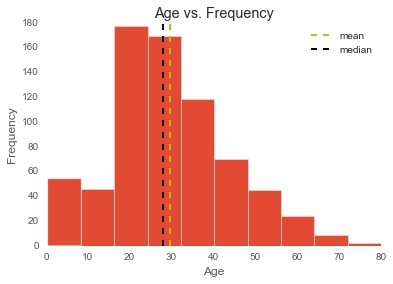

In [8]:
#'Age'.
#Plot a histogram to show the distribution of age.
#Notice that the plot is skewed to the right.
df['Age'].hist()
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age vs. Frequency")
plt.axvline(df['Age'].mean(), color='y', linestyle='dashed', linewidth=2, label = 'mean')
plt.axvline(df['Age'].median(), color='k', linestyle='dashed', linewidth=2, label = 'median')
plt.legend()
plt.show()

In [9]:
# fill NaN values in Age column with random values between (mean - std) & (mean + std)
# get average, std, and number of NaN values in titanic_df
average_age_titanic   = df["Age"].mean()
std_age_titanic       = df["Age"].std()
count_nan_age_titanic = df["Age"].isnull().sum()

# get average, std, and number of NaN values in test_df
average_age_test   = test_df["Age"].mean()
std_age_test       = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# fill NaN values in Age column with random values generated
df["Age"][np.isnan(df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

# convert from float to int
df['Age'] = df['Age'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)

/Applications/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Applications/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
import re

In [11]:
def getTitle(name):
    pattern = "\s[a-zA-Z_]+\."
    n = re.search(pattern, name)
    return n.group(0)[1:]

In [12]:
df['Title'] = df['Name'].map(lambda x: getTitle(x))

In [13]:
test_df['Title'] = test_df['Name'].map(lambda x: getTitle(x))

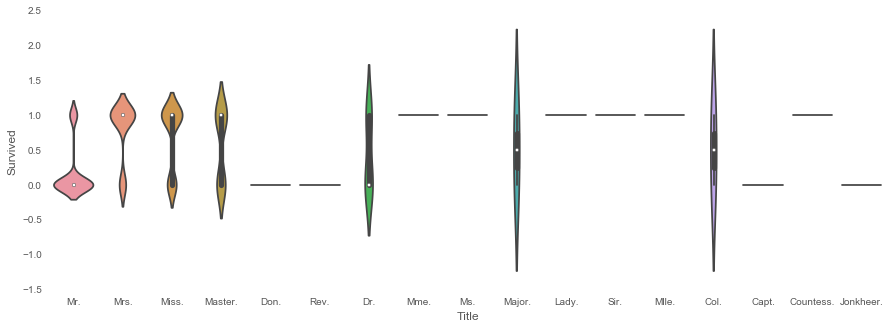

In [15]:
plt.figure(figsize=(15,5))
sns.bplot(x = 'Title', y = 'Survived', data = df)

In [14]:
def encodeTitle(title):
    if title in ['Mrs.','Miss.', 'Master.','Dr.','Major.','Col.']:
        return 1
    elif title in ['Mme.','Ms.', 'Lady','Sir.','Mlle.', 'Countess.']:
        return 2
    else:
        return 0

In [15]:
df['Title'] = df['Title'].map(lambda x: encodeTitle(x))
#df['Title'].head()

In [16]:
test_df['Title'] = test_df['Title'].map(lambda x: encodeTitle(x))

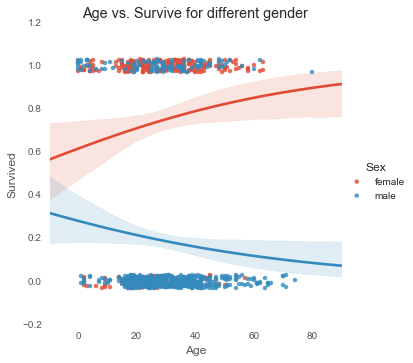

In [17]:
#average survived passengers by age and gender
#male and female have completely different relationship between age and survival chance
#Overall, females have much higher chance to survive.
sns.lmplot(x = 'Age', 
           y = 'Survived', 
           hue = 'Sex',
           data = df, 
           logistic=True, 
           y_jitter=.03, 
           hue_order=['female','male'])
plt.title("Age vs. Survive for different gender")

In [18]:
#fare: there is only one missing value - replace the missing value with median.
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

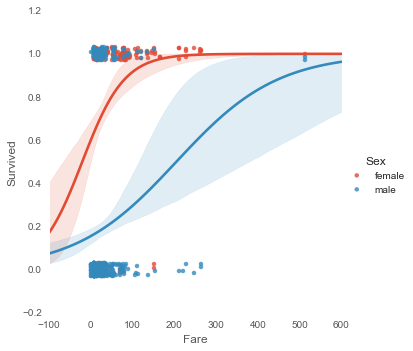

In [19]:
sns.lmplot(x = 'Fare', y = 'Survived', hue = 'Sex',data = df, hue_order=['female','male'],
           logistic=True, y_jitter=.03)

In [20]:
#family: a binary indicator of whether travelled with family or alone. 
#1: with family
#0: alone
def fam(df):
    df['Family'] = df['SibSp']+df['Parch']
    # df = df.drop(['SibSp', 'Parch'], axis = 1)
    df['Family'].loc[df['Family']>0] = 1
    return df

In [21]:
df = fam(df)
test_df = fam(test_df)

/Applications/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


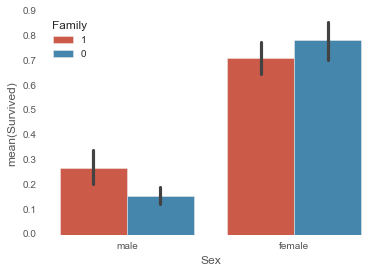

In [22]:
sns.barplot('Sex', 'Survived',data=df, hue = 'Family')

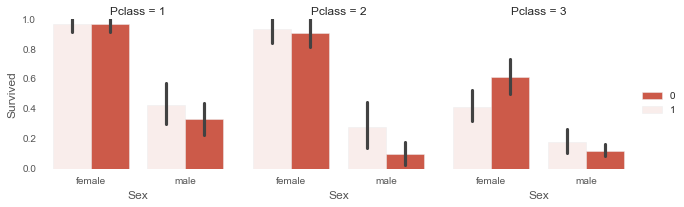

In [23]:
g = sns.FacetGrid(df, col="Pclass", col_order=[1,2,3])
g.map(sns.barplot, "Sex","Survived","Family", order=['female','male']);
g.add_legend();

In [24]:
#X['Sex'] = map(lambda x: 1 if x=='female' else 0, X['Sex'])
def catToNum(X):
    X['Sex'].loc[X['Sex'] == 'male'] = 0
    X['Sex'].loc[X['Sex'] == 'female'] = 1
    return X

In [25]:
train = catToNum(df)
test = catToNum(test_df)

In [26]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Title,Family
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7.2500,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71.2833,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7.9250,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53.1000,1,1
4,0,3,"Allen, Mr. William Henry",0,35,0,0,8.0500,0,0


In [27]:
train = train.drop('Name',axis = 1)
test = test.drop('Name',axis = 1)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Title       891 non-null int64
Family      891 non-null int64
dtypes: float64(1), int64(7), object(1)
memory usage: 69.6+ KB


In [19]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Title
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,Mrs.
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,Mrs.
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,Mr.


### playing with SQL

In [20]:
import sqlite3

In [45]:
conn = sqlite3.connect('test.db')
c = conn.cursor()

In [25]:
c.execute('DROP TABLE IF EXISTS titanic')
c.execute('''CREATE TABLE titanic
        (id int PRIMARY KEY,
        survived int,
        class int,
        name text,
        sex text,
        age int
        )''')
conn.commit()

In [27]:
df.to_sql(name = 'titan', con = conn)

In [31]:
dfsql = c.execute('''SELECT Name FROM titan WHERE Sex='male' AND Age = 22;
        ''').fetchall()
print dfsql
conn.commit()

[(u'Braund, Mr. Owen Harris',), (u'Moran, Mr. James',), (u'Sirayanian, Mr. Orsen',), (u'Waelens, Mr. Achille',), (u'Moss, Mr. Albert Johan',), (u'Barton, Mr. David John',), (u'Sage, Mr. Frederick',), (u'Perkin, Mr. John Henry',), (u'Berglund, Mr. Karl Ivar Sven',), (u'Maenpaa, Mr. Matti Alexanteri',), (u'Naidenoff, Mr. Penko',), (u'Dennis, Mr. Samuel',), (u'Ringhini, Mr. Sante',), (u'Plotcharsky, Mr. Vasil',), (u'Johansson, Mr. Erik',), (u'Karlsson, Mr. Nils August',), (u'Vovk, Mr. Janko',), (u'Leeni, Mr. Fahim ("Philip Zenni")',), (u'Paulner, Mr. Uscher',), (u'Gilinski, Mr. Eliezer',), (u'Elias, Mr. Dibo',)]


In [47]:
pd.read_sql_query(sql = '''SELECT Name, Fare,Pclass, Title, Survived FROM titan WHERE Sex='male' AND Age = 22;''', con=conn)

,Name,Fare,Pclass,Title,Survived
0,"Braund, Mr. Owen Harris",7.2500,3,Mr.,0
1,"Moran, Mr. James",8.4583,3,Mr.,0
2,"Sirayanian, Mr. Orsen",7.2292,3,Mr.,0
3,"Waelens, Mr. Achille",9.0000,3,Mr.,0
4,"Moss, Mr. Albert Johan",7.7750,3,Mr.,1
5,"Barton, Mr. David John",8.0500,3,Mr.,0
6,"Sage, Mr. Frederick",69.5500,3,Mr.,0
7,"Perkin, Mr. John Henry",7.2500,3,Mr.,0
8,"Berglund, Mr. Karl Ivar Sven",9.3500,3,Mr.,0
9,"Maenpaa, Mr. Matti Alexanteri",7.1250,3,Mr.,0


In [52]:
pd.read_sql(sql = '''SELECT * FROM titan WHERE Sex='male';''',con = conn).head()

,index,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Title
0,0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,Mr.
1,4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,Mr.
2,5,0,3,"Moran, Mr. James",male,22,0,0,8.4583,Mr.
3,6,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,51.8625,Mr.
4,7,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,21.0750,Master.


In [53]:
conn.close()

## Modelling

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.grid_search import RandomizedSearchCV

In [30]:
ntree = range(100,2000,100)
min_split = range(1,10,1)
min_leaf = range(1,10,1)
param_grid = dict(n_estimators = ntree, min_samples_split=min_split, min_samples_leaf = min_leaf)

In [31]:
X = train.drop('Survived', axis = 1)
y = train['Survived']
forest = RandomForestClassifier(
    random_state = 1,
    oob_score = True
)

In [32]:
rand = RandomizedSearchCV(forest, param_distributions = param_grid, cv=10,n_iter=30, scoring='accuracy',n_jobs=4)

In [41]:
rand.fit(X,y)

In [ ]:
#print rand.grid_scores_
print rand.best_score_
print rand.best_params_

In [34]:
forest = RandomForestClassifier(
    random_state = 1,
    n_estimators = 1400, 
    min_samples_split = 7, 
    min_samples_leaf = 3,
    oob_score = True
    #min_weight_fraction_leaf = 0.2
)

In [35]:
scores = cross_validation.cross_val_score(
    forest, 
    X, 
    y
)

In [36]:
print(scores.mean())

0.828282828283


In [37]:
def submission(alg, trainX,trainY,test, filename):
    alg.fit(trainX,trainY)
    predictions = alg.predict(test.drop("PassengerId",axis=1))
    sub = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions
        })
    sub.to_csv(filename, index = False)

In [38]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Family
0,3,0,22,1,0,7.2500,0,1
1,1,1,38,1,0,71.2833,1,1
2,3,1,26,0,0,7.9250,1,0
3,1,1,35,1,0,53.1000,1,1
4,3,0,35,0,0,8.0500,0,0


In [39]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Family
0,892,3,0,34,0,0,7.8292,0,0
1,893,3,1,47,1,0,7.0000,1,1
2,894,2,0,62,0,0,9.6875,0,0
3,895,3,0,27,0,0,8.6625,0,0
4,896,3,1,22,1,1,12.2875,1,1


In [40]:
submission(forest, X,y,test, 'output.csv')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)

In [ ]:
scores = cross_validation.cross_val_score(
    clf, 
    X, 
    y
)

In [ ]:
print(scores.mean())

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_validation.cross_val_score(clf, X,y)
print(scores.mean())

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
        max_depth=1, random_state=0).fit(X,y)
scores = cross_validation.cross_val_score(clf, X,y)
print(scores.mean())